## Computational Challenge 1

Group \#1

Students: Alan Akil, Danial Asgari, Daniel Ajuzie, Michael Batista, and Saul Acevedo

Course: Math 6397 - Stochastic Processes in Biology

Professors: Dr. Josić & Dr. Stewart

Challenge:

Rejection sampling is a useful method for generating random samples from a distribution
$f(x)$ that may be hard to sample from. The idea is to generate samples from a known distribution $g(x)$, and then either to accept or reject the samples. The criterion for acceptance and rejection, and the algorithm are described here

https://bookdown.org/rdpeng/advstatcomp/rejection-sampling.html

Use either the algorithm described in sections 6.3.1 or 6.3.3 on this webpage to do the following:

Use the uniform density on the unit interval as a candidate density to generate samples from the beta distribution.

Questions for discussion:
1. When do you think the method becomes inefficient?
2. Do you think that rejection sampling can be extended to higher dimensions? How?

In [14]:
# Import packages needed.
import numpy as np
import random
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import seaborn as sns

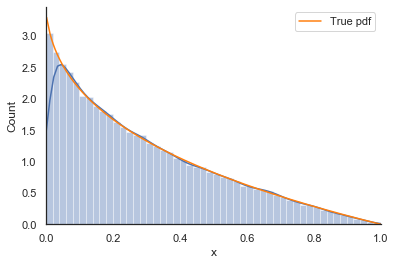

In [135]:
# Set seed for reproducibility
seed= 512
random.seed(seed)

# Pick alpha and beta such that the tails of g~U(0,1) are heavier.
alpha = 1.1
beta = 1.1
B=gamma(alpha)*gamma(beta)/gamma(alpha+beta) # Constant in the density of f~Beta(alpha,beta)
c = 1.001 # sup(f/g) - how to calculate?

Num_samples = 10**6 # Number of samples

U = np.random.uniform(0,1,(Num_samples,1)) # Samples to accept or reject
X = np.random.uniform(0,1,(Num_samples,1)) # Samples from candidate density g ~ U(0,1)
g = 1 # density of U(0,1)
accepted_samples = []

for i in range(Num_samples):
    x = X[i,0]
    f = ( x**(alpha-1) * (1-x**(beta-1)) ) / B  
    if U[i,0] < f/(g*c):
        accepted_samples.append(x)
        c = np.max((c,f/(g)))

accepted_samples = np.array(accepted_samples)


## Plot results
sns.set()
sns.set_style('whitegrid')
sns.set_style('white')

sns.distplot(accepted_samples,hist=True) # Distribution of accepted samples

x = np.linspace(0,1,num=10**4)
f = ( x**(alpha-1) * (1-x**(beta-1)) ) / B

plt.plot(x, f / np.sum(f[:-1]*np.diff(x)), color='tab:orange',label='True pdf') # True pdf

plt.xlim((0,1))
plt.xlabel('x')
plt.ylabel('Count')

plt.legend()

sns.despine()
plt.show()

## Results

Rejection sampling works remarkably well for values of $\alpha,\beta >1$, while for values lower than 1, no samples are accepted. This is because in rejection sampling, we need our candidate density to have heavier tails than the target distribution. For $\alpha,\beta<1$, the tails of the beta distribution are well above 1. 